<a href="https://colab.research.google.com/github/YakiVS/Diagnostico-del-Cancer-de-Tiroides-con-Machine-Learning/blob/main/Diagnostico_de_c%C3%A1ncer_de_tiroides_con_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de cáncer de tiroides

**Cáncer de tiroides**

El cáncer de tiroides es un tumor localizado dentro de la glándula tiroides y derivado de células tiroideas, es uno de los tipos de cáncer más frecuentes que suele aquejar a la comunidad femenina. Acorde con las estadísticas que emite la Organización Mundial de la Salud (OMS, 2022), es el quinto tipo de cáncer más recurrente a nivel global. Tan solo para el año 2022, 614 729 mujeres (representando un 6.4%) fueron diagnosticadas con cáncer de tiroides. Asimismo, esta estadística también se refleja en nuestro país, Perú. En Perú este tipo de cáncer también se ubica dentro de los 5 tipos de cáncer más frecuente en mujeres, tal que, para el año 2022, 1848 mujeres (representando un 4.7 %) fueron diagnosticadas con este tipo de enfermedad.

Si bien este tipo de cáncer no es tan nocivo en comparación a otros y que, a su vez, su tasa de mortalidad posterior a su diagnóstico es relativamente menor, no deja de ser un problema a tomar en consideración. Ya que su frecuencia es evidente y alarmante como otros. No obstante, es desconocida y poco informada entre la comunidad femenina. Por tal motivo, no se suele abordar estrategias de orientación para su prevención.

Las personas que han superado el tratamiento contra el cáncer de tiroides, en general, no suelen enfrentar complicaciones graves. Sin embargo, su calidad de vida puede verse afectada debido a la necesidad de consumir medicamentos de por vida. Además, algunos pacientes pueden experimentar secuelas tras la cirugía, como parálisis de las cuerdas vocales, dificultades para la deglución o limitaciones en la movilidad del hombro (Sáez, 2021).

Luego poner en contexto la problemática y brindar un panorama que evidencie este hecho. Les presento un proyecto que realicé, en el cual se aborda el diagnóstico de cáncer de tiroides empleando técnicas de machine learning.

Fuente de donde se obtuvieron los para los datos:
Borzooei, S., Briganti, G., Golparian, M. et al. Machine learning for risk stratification of thyroid cancer patients: a 15-year cohort study. Eur Arch Otorhinolaryngol 281, 2095–2104 (2024). https://doi.org/10.1007/s00405-023-08299-w



# Importación de las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de nuestro conjunto de datos

In [3]:
dataset = pd.read_csv('thyroid_cancer_risk_data.csv')
dataset.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


# Visualización de nuestro dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [4]:
dataset.shape

(212691, 17)

## Verificamos la existencia de valores nulos y duplicados

In [6]:
dataset.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset.dtypes

,0
Patient_ID,int64
Age,int64
Gender,object
Country,object
Ethnicity,object
Family_History,object
Radiation_Exposure,object
Iodine_Deficiency,object
Smoking,object
Obesity,object


## Realizamos una copia de nuestro dataset para inicar a realizar cambios en él.

In [9]:
copy_data = dataset.copy()

In [10]:
# Eliminamos la columna del ID
copy_data = copy_data.drop('Patient_ID', axis =1)
copy_data.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


## Realizamos Análisis Exploratorio de Datos (EDA) para ver la relación existente entre las características.

In [11]:
import warnings
warnings.simplefilter("ignore")

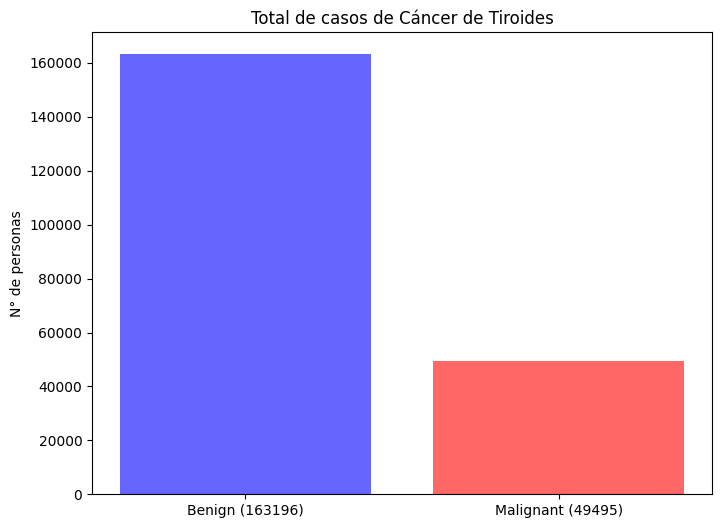

In [12]:
# Realizamos la visualización del total de casos Beningnos y Malignos

casos_benignos = copy_data[copy_data["Diagnosis"] == "Benign"].shape[0]
casos_malignos = copy_data[copy_data["Diagnosis"] == "Malignant"].shape[0]

plt.figure(figsize=(8,6))
plt.bar(["Benign (%d)" % casos_benignos, "Malignant (%d)" % casos_malignos],
        [casos_benignos, casos_malignos],
        color=["blue", "red"], alpha=0.6, width=0.8)

plt.ylabel("N° de personas")
plt.title("Total de casos de Cáncer de Tiroides")
plt.show()

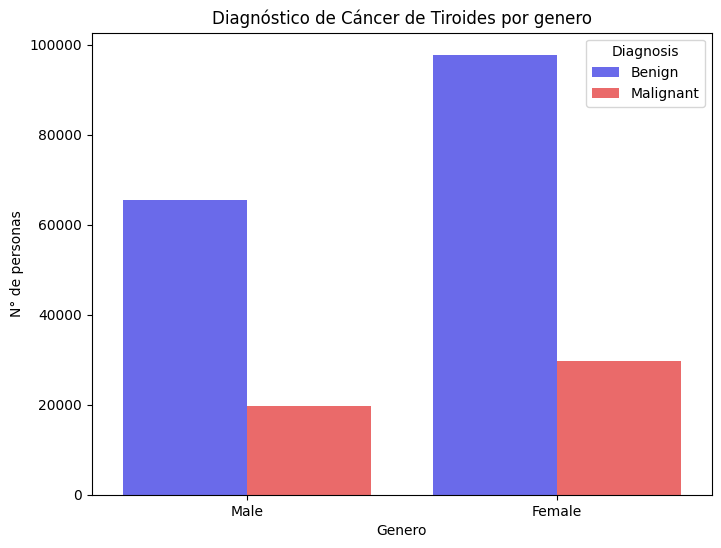

In [13]:
# visualización del diagnostico según género
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", hue="Diagnosis", data=copy_data, palette="seismic", width=0.8)
plt.title("Diagnóstico de Cáncer de Tiroides por genero")
plt.xlabel("Genero")
plt.ylabel("N° de personas")
plt.show()

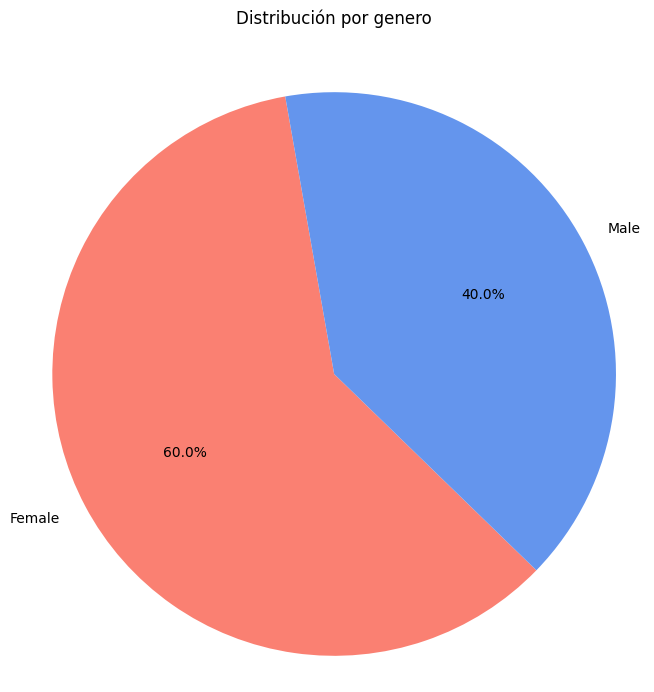

In [14]:
num_x_genero = copy_data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(num_x_genero,
        labels=num_x_genero.index,
        autopct='%1.1f%%',
        startangle=100,
        colors=['salmon','cornflowerblue'])

plt.title('Distribución por genero', pad=30)
plt.axis('equal')
plt.show()

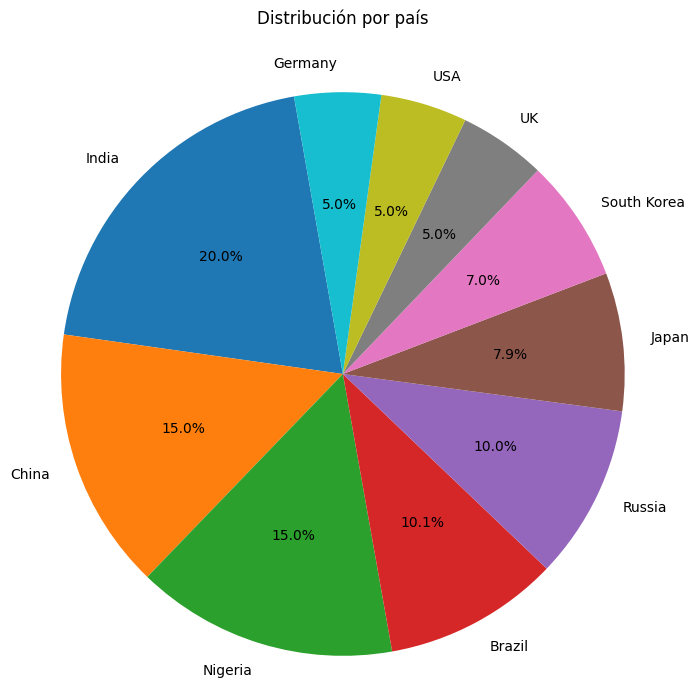

In [15]:
# Distribución de los casos según país
num_x_pais = copy_data['Country'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(num_x_pais,
        labels=num_x_pais.index,
        autopct='%1.1f%%',
        startangle=100)

plt.title('Distribución por país', pad=30)
plt.axis('equal')
plt.show()

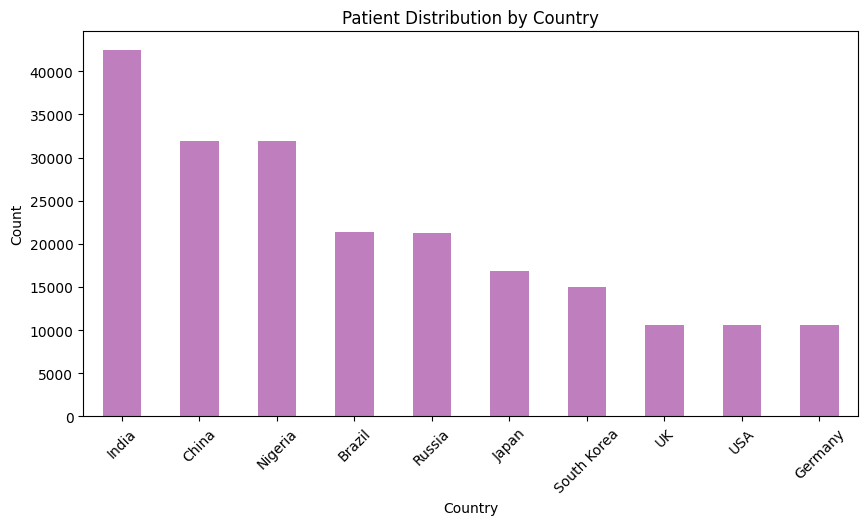

In [16]:
# Distribución de casos por país
plt.figure(figsize=(10, 5))
copy_data["Country"].value_counts().plot(kind="bar", color="purple", alpha=0.5)
plt.title("Patient Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

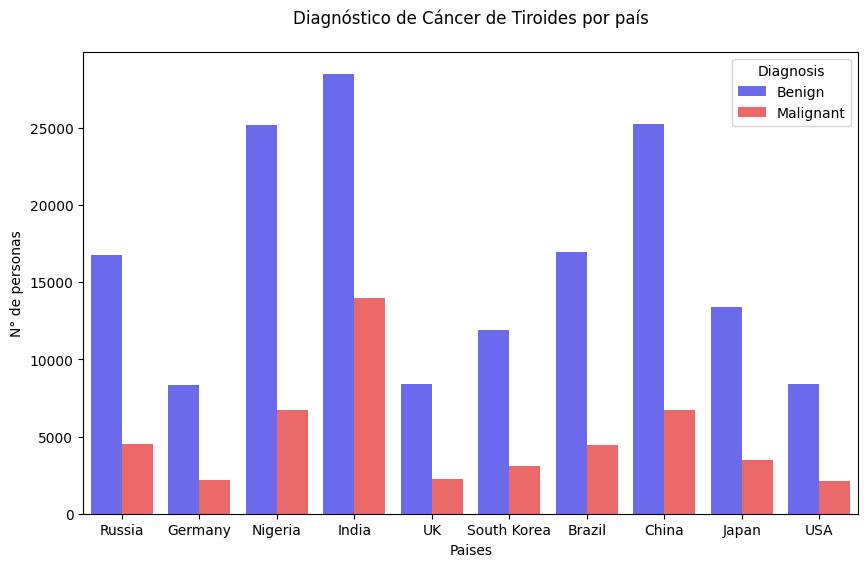

In [17]:
# Distribución del diagnostico (Benign o Malignant) según el país
plt.figure(figsize=(10, 6))
sns.countplot(x="Country", hue="Diagnosis", data=copy_data, palette="seismic", width=0.8)
plt.title("Diagnóstico de Cáncer de Tiroides por país", pad=20)
plt.xlabel("Paises")
plt.ylabel("N° de personas")
plt.show()

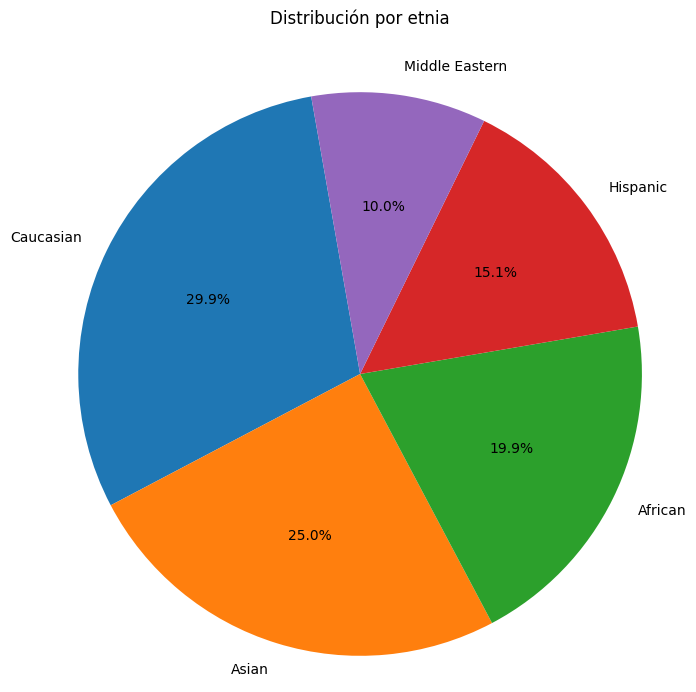

In [18]:
# Distribución de los casos según la etnia
num_x_etnia = copy_data['Ethnicity'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(num_x_etnia,
        labels=num_x_etnia.index,
        autopct='%1.1f%%',
        startangle=100)

plt.title('Distribución por etnia', pad=30)
plt.axis('equal')
plt.show()

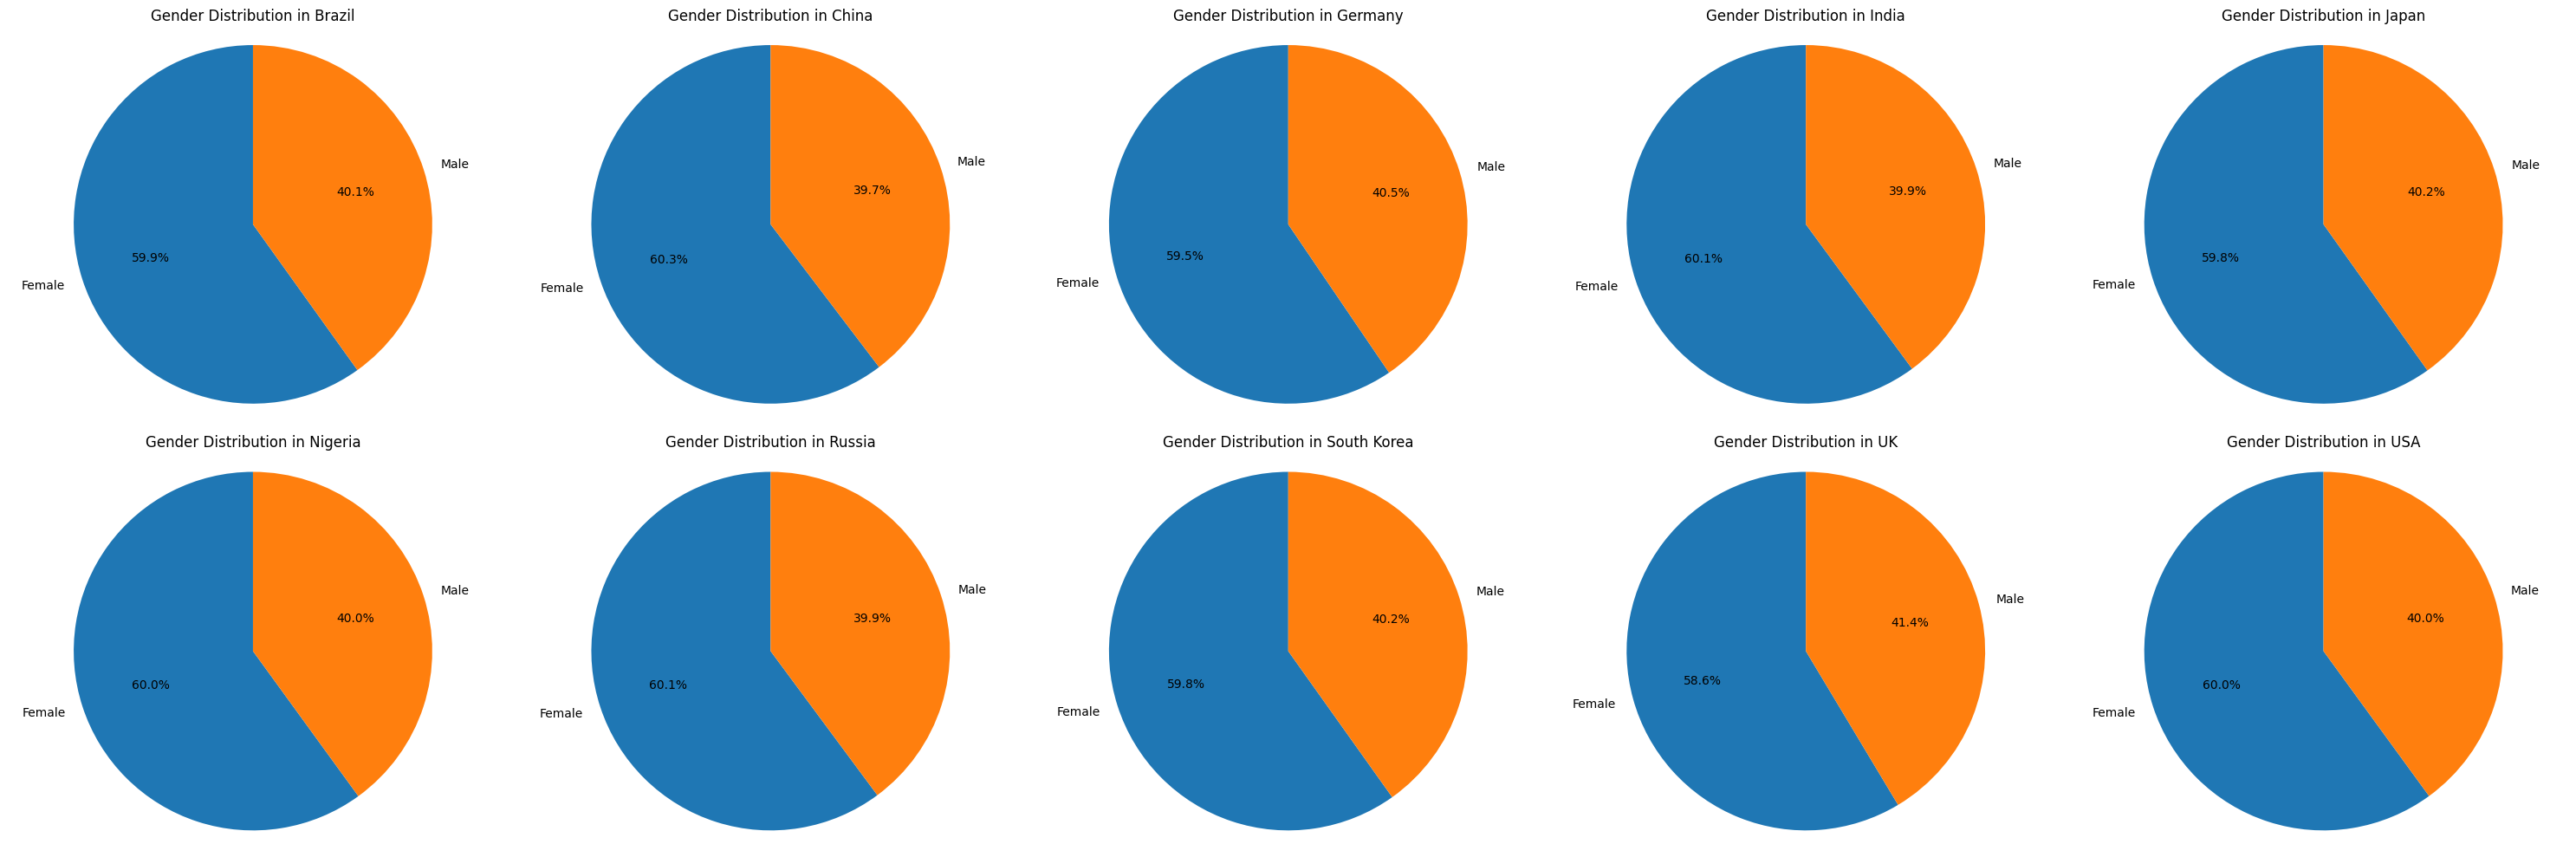

In [19]:
# Distribución de casos según el genero, por cada país
coun = copy_data.groupby('Country')['Gender'].value_counts(normalize=True).unstack().reset_index()

num_countries = len(coun)
num_cols = int(np.ceil(num_countries / 2))
fig, axes = plt.subplots(2, num_cols, figsize=(6 * num_cols, 10))

axes = axes.flatten()

for index, row in enumerate(coun.itertuples()):
    gender_labels = row._fields[2:]
    gender_values = [getattr(row, label) for label in gender_labels]

    axes[index].pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=90)
    axes[index].set_title(f"Distribución de genero en {row.Country}")
    axes[index].axis('equal')

for i in range(index + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

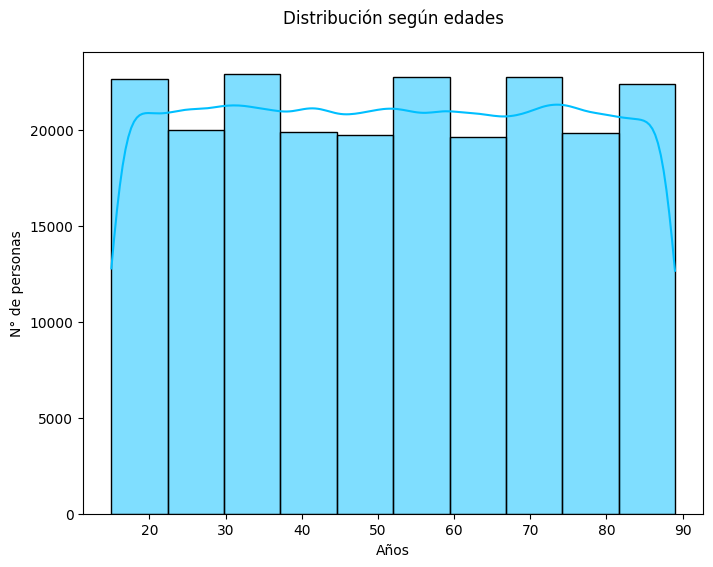

In [20]:
# Distribución según la edad de las personas
plt.figure(figsize=(8, 6))
sns.histplot(copy_data["Age"], kde=True, bins=10, color="DeepSkyBlue")
plt.title("Distribución según edades", pad=20)
plt.xlabel("Años")
plt.ylabel("N° de personas")
plt.show()

# Modelo de Machine **Learning**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
copy_data.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [23]:
x_categorico = copy_data.select_dtypes(include='object')
label_encoders = {}
for c in x_categorico.columns:
    label_encoder = LabelEncoder()
    copy_data[c] = label_encoder.fit_transform(copy_data[c])
    label_encoders[c] = label_encoder

In [24]:
copy_data.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0


In [25]:
copy_data["Diagnosis"].value_counts()

,count
Diagnosis,
0,163196
1,49495


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = copy_data.iloc[:,:-1].values
y = copy_data.iloc[:, -1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Randon Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
ml_rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ml_rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [35]:
# Predecimos con el conjunto de datos de prueba
y_test_pred = ml_rfc.predict(X_test)

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1 = f1_score(y_test, y_test_pred, average='binary')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5424


# Balanceamos los datos

In [62]:
# Separamos los datos
datos_benign = copy_data[copy_data['Diagnosis']==0]
datos_malignant = copy_data[copy_data['Diagnosis']==1]

## Realizamos un submuestreo

In [63]:
# Realizamos un submuestreo
submuestreo = datos_benign.sample(n=49495, replace=False, random_state=0)
submuestreo

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
36341,25,0,6,1,1,0,0,0,0,1,9.53,2.53,8.03,1.09,0,0
19207,84,1,9,2,0,0,0,0,0,0,4.04,2.33,5.54,3.86,2,0
1950,35,1,9,2,0,0,0,0,1,0,8.73,1.06,8.75,4.91,2,0
86222,73,0,1,1,1,1,0,0,0,0,8.08,0.89,9.12,3.04,0,0
44461,85,1,0,2,1,0,0,1,0,0,3.51,1.88,8.88,1.14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79861,84,0,1,0,0,0,0,1,0,0,5.78,0.73,8.78,4.59,1,0
112721,27,0,0,1,0,0,0,0,0,1,3.11,1.87,4.92,2.88,1,0
187903,52,0,7,3,1,0,1,0,0,0,6.69,2.68,5.70,3.98,1,0
57512,46,0,0,2,0,0,0,0,0,0,1.62,0.54,5.39,3.85,1,0


In [76]:
submuestreo_total = pd.concat([datos_malignant,submuestreo])
datos_submuestreo = submuestreo.iloc[:, :-1]
clase_submuestreo = submuestreo.iloc[:, -1:]

In [77]:
submuestreo_total

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
6,89,0,7,1,1,1,0,0,1,0,4.70,0.62,11.73,0.01,0,1
8,17,0,6,0,0,1,0,0,0,1,2.30,2.60,11.89,0.81,0,1
10,67,1,5,0,0,1,0,0,0,0,9.65,1.82,8.17,0.35,0,1
12,44,1,7,1,1,0,0,0,0,1,6.77,1.37,6.13,4.15,0,1
21,63,0,5,1,0,0,0,0,1,1,6.97,3.48,7.67,0.46,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79861,84,0,1,0,0,0,0,1,0,0,5.78,0.73,8.78,4.59,1,0
112721,27,0,0,1,0,0,0,0,0,1,3.11,1.87,4.92,2.88,1,0
187903,52,0,7,3,1,0,1,0,0,0,6.69,2.68,5.70,3.98,1,0
57512,46,0,0,2,0,0,0,0,0,0,1.62,0.54,5.39,3.85,1,0


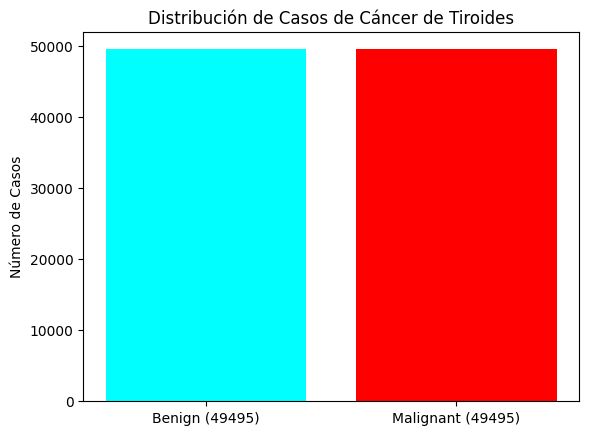

In [78]:
# Realizamos la visualización del nuevo conjunto de datos
num_benignos = submuestreo_total [submuestreo_total ["Diagnosis"] == 0].shape[0]
num_malignos = submuestreo_total [submuestreo_total ["Diagnosis"] == 1].shape[0]

plt.bar(["Benign (%d)" % num_benignos, "Malignant (%d)" % num_malignos],
        [num_benignos, num_malignos],
        color=["cyan", "red"],
        width=0.8)

plt.ylabel("Número de Casos")
plt.title("Distribución de Casos de Cáncer de Tiroides")
plt.show()

## Entrenamos nuevamente el modelo, luego de realizar el submuestreo

In [79]:
X_sbm = submuestreo_total.iloc[:,:-1].values
y_sbm = submuestreo_total.iloc[:, -1].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_sbm, y_sbm, test_size=0.2)

In [95]:
ml_rfc_sbm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ml_rfc_sbm.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [96]:
# Predecimos con el conjunto de datos de prueba
y_test_pred_sbm = ml_rfc.predict(X_test)

In [98]:
f1 = f1_score(y_test, y_test_pred_sbm, average='binary')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9362


## Realizamos un sobremuestreo

In [99]:
# Realizamos un sobremuestreo
sobremuestreo = datos_malignant.sample(n=163196, replace=True, random_state=0)
sobremuestreo

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
11608,30,1,3,1,1,0,0,1,1,1,6.73,1.96,5.13,1.17,0,1
187318,68,0,6,1,1,0,0,1,0,1,0.62,1.37,6.80,2.72,0,1
183153,53,0,5,0,0,0,0,1,1,0,3.49,2.71,7.06,3.06,1,1
197201,83,1,6,3,0,0,1,0,0,0,5.94,1.58,7.97,2.56,1,1
91249,62,1,3,1,1,0,0,0,1,0,8.81,2.26,8.20,1.47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65437,67,1,3,3,0,0,1,1,0,0,2.85,3.17,5.15,0.45,0,1
61508,18,1,3,1,0,0,0,0,1,0,8.87,2.73,5.03,3.39,2,1
2614,33,1,3,2,0,0,1,1,0,0,8.50,0.62,11.91,4.50,0,1
52813,43,1,0,2,0,0,0,0,0,0,6.91,3.45,5.14,1.60,1,1


In [100]:
sobremuestro_total = pd.concat([sobremuestreo, datos_benign])
datos_sobremuestreo = sobremuestreo.iloc[:, :-1]
clase_sobremuestreo = sobremuestreo.iloc[:, -1:]

In [108]:
sobremuestro_total['Diagnosis'].value_counts()

,count
Diagnosis,
1,163196
0,163196


## Entrenamos nuevamente el modelo, luego de realizar el sobremuestreo

In [110]:
X_sobm = sobremuestro_total.iloc[:,:-1].values
y_sobm = sobremuestro_total.iloc[:, -1].values

In [113]:
X_train_sobm, X_test_sobm, y_train_sobm, y_test_sobm = train_test_split(X_sobm, y_sobm, test_size=0.2)

In [114]:
ml_rfc_sobm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ml_rfc_sobm.fit(X_train_sobm, y_train_sobm)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [115]:
# Predecimos con el conjunto de datos de prueba
y_test_pred_sobm = ml_rfc.predict(X_test_sobm)

In [116]:
f1 = f1_score(y_test_sobm, y_test_pred_sobm, average='binary')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7815
